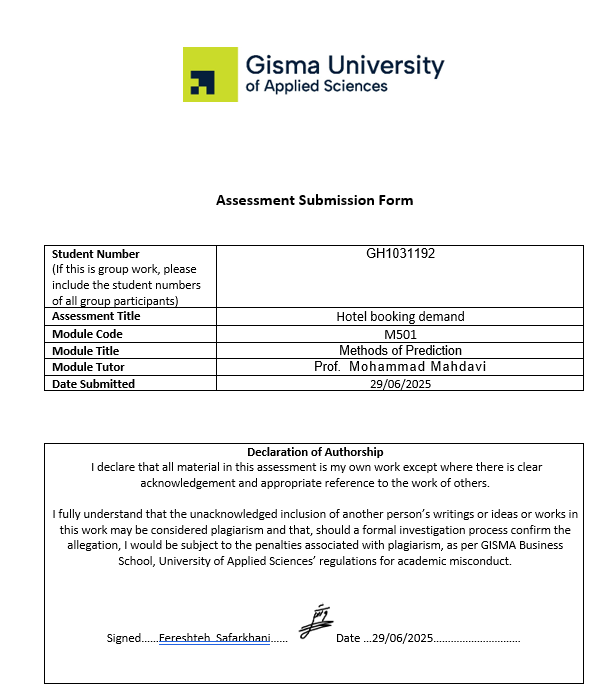

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction

 Customer behavour is one of the main point in Booking hotels that effects operational and  financial outcomes. One of the issues managers encuntered is that cancelation can not be predicted which is makes it hard to make decision for them. Machine leaning comes here while we have increasing datas daily,  This project uses neural networks to develop a predictive model to supports better decision-making in hotel management.

## Problem Statement

Nowadays, Managing cancelation in a big issue in hospitality industry. This will cause problems such as revenue loss, inefficient resource, and reduced performance.
This can be solves by predictiing booking cancelation applying stoping measures such as overbooking strategies or personalized customer engagement before happening.

## Data Source

I used the Hotel Booking  Dataset available on Kaggle: (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand), which contains detailed booking information from two types of hotels: a city and a resort hotel. its 119,390 records and 30 features, showing booking behaviors.

## Machine Learning Objective
We can say that this problem is a binary classification which uses a deep neural network to predict the booking will be canceled or not. Our aim is to have the most accuracy and and recall for the canceled class which is very important for having the better decision maing.



## Importing necessary libraries
Importing libraries is needed to analyse dataset and build our machineleaning model, Due to this, i imported some necessary libraries for handle adta , visualization, preprocessingg and modeling.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf


## Loading the Dataset and checking the structure


In [3]:

df = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')
print("Dataset shape:", df.shape)
df.head(3)

Dataset shape: (119390, 30)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0


## Statistical Summary of Numerical Features
By checking statistical summey of our dataset, We can see that 37% of booking were canceled and there was 104 guesed book on overage. Most people had short stay around 2 or 3 nights and there was not much baby and the average adults were 2. booking price average was almost €101. Some guest were waiting for almmost a year and had no previous cancelation.


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Statistical Summary of Categorical Features
We also analyzed the categorical features in the dataset and understand most bookings were made for City Hotels (79,330%) and it happend most  in August. The most of guests selected the "BB" (bed and breakfast) plan. Portugal (PRT) was the most common country of origin. Online travel agencies and travel agents (TA/TO) were the market and distribution channels. Room  "A" was the most commonly reserved. most bookings needed no deposit, and the common customer type was transient customers. Missing values in "country" (118,902 vs. 119,390 total) need to be clean.


In [5]:
df.describe(include='object').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


# Data Cleaning
## Cheking missing value:
we have 4 missing features that we should clean them before everything.
Specifically, the company column has the most missing values with  112,000 null entries, also agent with about 16,000 missing records and country with 488. Children column is missing 4 values.



In [6]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


#Handling Missing Values




1. children (4 missing)

I use Median because it is useful for small numerical values like children age and we dont have many missing here.


In [7]:
df['children'] = df['children'].fillna(df['children'].median())

 2. country (488 missing)

ّFor country i used Mode here to find missing ones that might belongs there because its categorical.


In [8]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

 3. agent (16340 missing)

Missing agent means we have no agent and it is direct booking, In this case i make them 0 which is the standard way to represent that.

In [9]:
df['agent'] = df['agent'].fillna(0).astype(int).astype(str)


4. company (missing 112593)

More than 94% of the column is missing, So it is better to drop it. especially when we dont want to analyze company related behavior.

In [10]:
df.drop(['company'], axis=1, inplace=True)


Invalid Row : Here we say if we have such rows with no children babies and adults which means no guest, remove them . These are data errors!

In [11]:

df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

I droped redundant date columns which is unnecessory for us


In [12]:
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                  'arrival_date_day_of_month'], axis=1)


# visualization

I use some visualization to have a deeper view of the problem and dataset.



### Visualization: Lead Time Distribution

This histogram shows the pattern with most bookings (over 30000) within 100 days that falls very fast and hardly anyone books 600-700 days ahead. This shows that cancellations will happen with last minute of bookings and also lead time is a main key for our dataset.


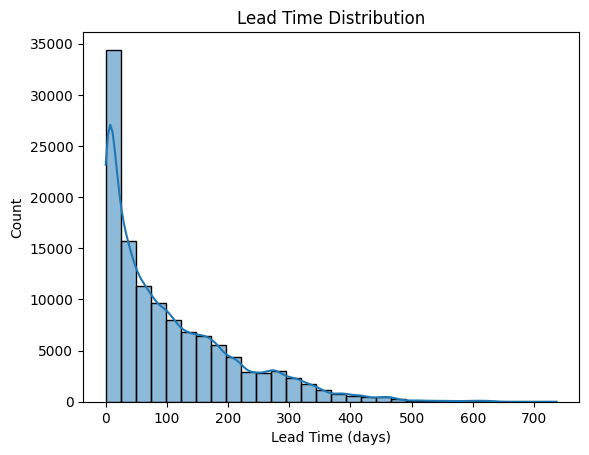

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['lead_time'], kde=True, bins=30)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.show()

### Visualization: Correlation Heatmap

The correlation heatmap shows how numerical features relate to each other. We can see the correlation between lead_time and is_canceled that shows that longer lead times increases the cancellation. while, adr (price) has a weaker correlation to cancellations that it shows pricing is not that important that people cacel their booking rather than lead time.


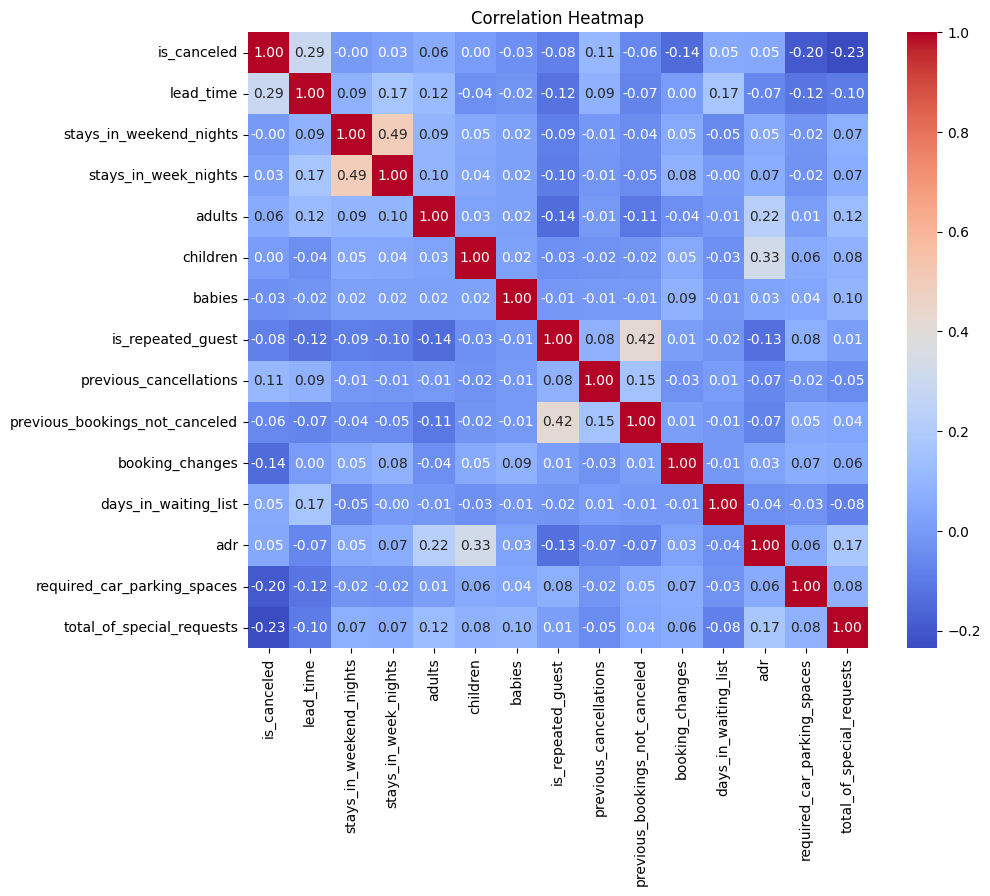

In [14]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Data Analysing

#Target Encoding

Our target variable is is_canceled, which shows a booking was canceled (1) or not (0). Since it is already in numeric binary (classification), so label encoding is no needed But i rename it to target to handle misspelling

In [15]:
df.rename(columns={"is_canceled": "target"}, inplace=True)
df["target"].value_counts()

,count
target,
0,75011
1,44199


It is clear that our target value is imballance, i will solve it after splliting my data into train and test.



#Defining Features (X) and Labels (y)

Now i split the dataset into:

X: All features (input variables)

y: The target column (what we want to predict)

In [16]:
X = df.drop('target', axis=1)
y = df['target']

print("X:",X.shape)
print("y:",y.shape)

X: (119210, 24)
y: (119210,)


 # Splitting the data

I split a dataset into training, validation, and test sets. It splits features X and target y into temporary and test sets with 20% for testing. Then, X_temp and y_temp are split into training  and validation sets, with 10% of X_temp for validation.

In [17]:

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=42)


#Feature Engineeering
# Preprocessing (One-Hot Encoding and Standadization)


Define categorical and numerical columns


In [18]:
categorical_cols = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'agent']
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                  'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                  'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                  'total_of_special_requests']


I used ColumnTransformer for the preprocessing to apply different transformations to numerical and categorical features. For numerical  i used imputes missing values using the mean (SimpleImputer) and then standardizes the values using StandardScaler. For categorical fo filling missing values i used  string 'Unknown' and then applies one-hot encoding with OneHotEncoder.
The parameter sparse_output=False ensures that the output is a dense array.



















In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Handling Class Imbalance Using SMOTE

While we analyzed the target (y), we understood that Target label is not balanced.

To solve this, we apply SMOTE to creates samples for the minority class to balance the data.

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Designing the Model


✅Model 1: Baseline Model




First Model is baseline with a  0.0001 learning rate.This Keras code creates a neural network to predict booking cancellations.It has an input layer a 256-neuron hidden layer with Relu activation, and a 1-neuron output with sigmoid activation for 0-1 output.
this uses Adam aptimiser, binary crossentropy loss, and accuracy metric for evaluation. It also trains with 200 epochs, batch size 256 and early stops if validation accuracy stops for 20 epochs.


In [21]:
model1= keras.Sequential()
model1.add(tf.keras.Input(shape=(X_train.shape[1],)))
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history1 = model1.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅ Model 2: Baseline Model with Higher Learning Rate

If i want to compare it with model 1, Model 2 uses a higher learning rate (0.001) to speed up training. It has one input layer, one hidden with 256 neurons and Relu activation and one output with 1 neuron and sigmoid activation. It also uses the Adam optimizer, binary crossentropy loss, and accuracy metric, training for 200 epochs with a batch size of 256 and early stopping.

In [22]:
model2= keras.Sequential()
model2.add(tf.keras.Input(shape=(X_train.shape[1],)))
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅ Model 3: by adding Dropout layer:
Second model has one input layer matching X_train’s feature count, a hidden layer with 256 neurons Relu activation and one dropout layer 0.3 rate, randomly deactivating 30% of neurons to prevent overfitting. Also an output layer with 1 neuron and sigmoid activation. Compiled with Adam optimizer with learning rate 0.001, binary crossentropy loss, and accuracy metric that trains for 200 epochs, batch size 256 and stopping early. Compared to model2, the dropout layer is the key addition to improve generalization.

In [23]:
model3= keras.Sequential()
model3.add(tf.keras.Input(shape=(X_train.shape[1],)))
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history3 = model3.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅ Model 4: with Dropout layer and changing its rate:


ّFor this model I used one big layer with 256 helpers and Relu then added 30% dropout. I put a final layer to give a 0-to-1 score for the answer. I chose the Adam optimizer with a 0.001 step size to learn nice and steady, and used binary crossentropy to check its guesses. Compared to model3, it uses a lower dropout rate (0.2 vs. 0.3) to balance regularization.

In [24]:
model4= keras.Sequential()
model4.add(tf.keras.Input(shape=(X_train.shape[1],)))
model4.add(tf.keras.layers.Dense(256, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history4 = model4.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)




✅ Model 5:with Dropout layer and decrese its rate:

This model uses a hidden layer with 256 neurons, Relu activation with dropout layer 0.1 rate, deactivating 10% of neurons to reduce overfitting and one output layer with 1 neuron sigmoid activation. Compiled with the Adam optimizer with learning rate 0.001, binary crossentropy loss and accuracy metric, it trains for 200 epochs, batch size 256 and stopping early. Compared to model4, it uses a lower dropout rate (0.1 vs. 0.2), reducing regularization intensity.


In [25]:
model5= keras.Sequential()
model5.add(tf.keras.Input(shape=(X_train.shape[1],)))
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.1))
model5.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history5 = model5.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅ Model 6:with Bachnormalization layer:

Compared to model5, model6 adds a batch normalization layer after the dropout with 0.1 rate to stabilize and make the training faster, while keeping the same optimizer, loss, and training settings.

In [26]:
model6= keras.Sequential()
model6.add(tf.keras.Input(shape=(X_train.shape[1],)))
model6.add(tf.keras.layers.Dense(256, activation='relu'))
model6.add(tf.keras.layers.Dropout(0.1))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history6 = model6.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅ Model 7: with two hidden layer:

Compared to model6, model7 adds a second hidden layer with 128 neurons with Relu activation and by another dropout layer 0.1 rate and batch normalization layer that increasing model complexity while keeping the same optimizer, loss, and training settings.

In [27]:
model7 = keras.Sequential()
model7.add(tf.keras.Input(shape=(X_train.shape[1],)))
model7.add(tf.keras.layers.Dense(256, activation='relu'))
model7.add(tf.keras.layers.Dropout(0.1))
model7.add(tf.keras.layers.BatchNormalization())
model7.add(tf.keras.layers.Dense(128, activation='relu'))
model7.add(tf.keras.layers.Dropout(0.1))
model7.add(tf.keras.layers.BatchNormalization())
model7.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history7 = model7.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅Model 8:with three hidden layer:


 Compared to model7, model8 adds a third hidden layer with 64 neurons with Relu activation, also by another dropout layer (0.1 rate) and batch normalization layer. also increasing model complexity while keeping the same optimizer, loss, and training settings.

In [28]:
model8 = keras.Sequential()
model8.add(tf.keras.Input(shape=(X_train.shape[1],)))
model8.add(tf.keras.layers.Dense(256, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.1))
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.Dense(128, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.1))
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.Dense(64, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.1))
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history8 = model8.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅ Model 9: with more norouns:

For model 9 i increased the first hidden layer to 512 neurons then 256 and a third hidden layer with 128 neurons, all with Relu activation. Dropout layer (0.1 rate) and batch normalization layer, while keeping the second hidden layer at 256 neurons, and maintaining the same optimizer with model 7 , loss, and training settings. This makes the model deeper and wider for potentially better feature learning. *italicized text*

In [29]:
model9 = keras.Sequential()
model9.add(tf.keras.Input(shape=(X_train.shape[1],)))
model9.add(tf.keras.layers.Dense(512, activation='relu'))
model9.add(tf.keras.layers.Dropout(0.1))
model9.add(tf.keras.layers.BatchNormalization())
model9.add(tf.keras.layers.Dense(256, activation='relu'))
model9.add(tf.keras.layers.Dropout(0.1))
model9.add(tf.keras.layers.BatchNormalization())
model9.add(tf.keras.layers.Dense(128, activation='relu'))
model9.add(tf.keras.layers.Dropout(0.1))
model9.add(tf.keras.layers.BatchNormalization())
model9.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model9.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history9 = model9.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


✅ Model 10: with four hidden layer and more norons:

Compared to model9, model10 adds a fourth hidden layer with 64 neurons with all Relu activation and dropout layer (0.1 rate), batch normalization layer, also reduces the batch size from 256 to 128 with the same optimizer, loss, and training settings to increase model depth and may improve learning with smaller.

In [30]:
model10 = keras.Sequential()
model10.add(tf.keras.Input(shape=(X_train.shape[1],)))
model10.add(tf.keras.layers.Dense(512, activation='relu'))
model10.add(tf.keras.layers.Dropout(0.1))
model10.add(tf.keras.layers.BatchNormalization())
model10.add(tf.keras.layers.Dense(256, activation='relu'))
model10.add(tf.keras.layers.Dropout(0.1))
model10.add(tf.keras.layers.BatchNormalization())
model10.add(tf.keras.layers.Dense(128, activation='relu'))
model10.add(tf.keras.layers.Dropout(0.1))
model10.add(tf.keras.layers.BatchNormalization())
model10.add(tf.keras.layers.Dense(64, activation='relu'))
model10.add(tf.keras.layers.Dropout(0.1))
model10.add(tf.keras.layers.BatchNormalization())
model10.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss="binary_crossentropy",metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20)
history10 = model10.fit(X_train, y_train, epochs=200, batch_size=256,validation_data=(X_val, y_val),callbacks=[es_callback], verbose=0)


#Comparison


Here i want to see how well my 10 neural networks model works, so I checked them with training and validation accuracy.
First, I used the training history of each model to see tracks how they learned. Then, I see the final training and validation accuracy for each one and stored them in a list. I turned that list into  DataFrame to easily see the results. This will help us compare how well each model perform.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

histories = [history1,history2,history3,history4,history5,history6,history7,history8,history9,history10]

results = []
for i, history in enumerate(histories, start=1):
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    results.append({
        'Model': f'Model {i}',
        'Training Accuracy': final_train_acc,
        'Validation Accuracy': final_val_acc
    })

results_df = pd.DataFrame(results)
print(results_df)

melted_df = results_df.melt(id_vars='Model',
                            value_vars=['Training Accuracy', 'Validation Accuracy'],
                            var_name='Metric',
                            value_name='Accuracy')



      Model  Training Accuracy  Validation Accuracy
0   Model 1           0.889989             0.860019
1   Model 2           0.910199             0.859914
2   Model 3           0.904107             0.864318
3   Model 4           0.900663             0.867568
4   Model 5           0.902061             0.864003
5   Model 6           0.910550             0.863794
6   Model 7           0.920401             0.861697
7   Model 8           0.916124             0.867778
8   Model 9           0.932695             0.863060
9  Model 10           0.928242             0.863479


The bar chart shows a comparison of training and validation accuracy among all ten models. Model 9 achieves the highest training accuracy 93.2% but Model 8 could get the highest validation accuracy 86.7% by balancing learning and generalization. So model 8 is suitable for deployment in predicting booking cancellations.


<!-- I created a bar chart that each model has two bars for training and the validation.
Among them, Model 3 stands out as the best-performing option when it comes to balancing learning and generalization. It achieved a solid 90.2% training accuracy and an impressive 86.7% validation accuracy—an indication that it learns well from the training data while also performing reliably on unseen data.

What makes Model 3 especially noteworthy is its simplicity. Unlike deeper models that stack more layers and risk overfitting, Model 3 keeps things efficient and effective. Its architecture is straightforward but powerful enough to deliver consistent results, making it a reliable and practical choice for real-world use.







 -->


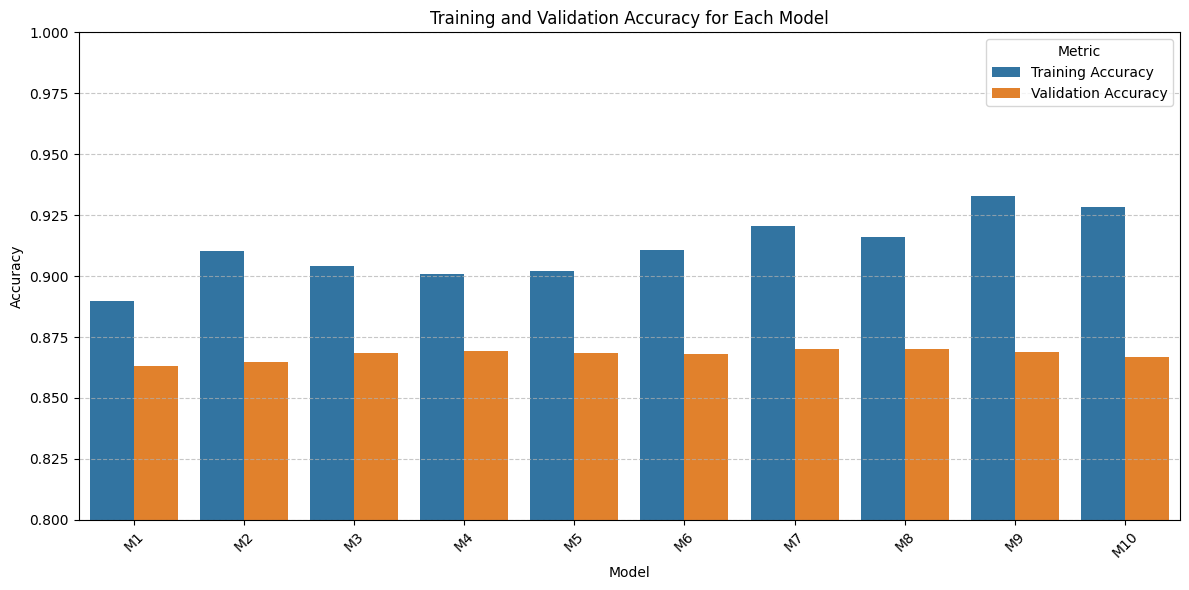

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    'Model': [f'M{i}' for i in range(1, 11)],
    'Training Accuracy': [
        max(history1.history['accuracy']),
        max(history2.history['accuracy']),
        max(history3.history['accuracy']),
        max(history4.history['accuracy']),
        max(history5.history['accuracy']),
        max(history6.history['accuracy']),
        max(history7.history['accuracy']),
        max(history8.history['accuracy']),
        max(history9.history['accuracy']),
        max(history10.history['accuracy']),
    ],
    'Validation Accuracy': [
        max(history1.history['val_accuracy']),
        max(history2.history['val_accuracy']),
        max(history3.history['val_accuracy']),
        max(history4.history['val_accuracy']),
        max(history5.history['val_accuracy']),
        max(history6.history['val_accuracy']),
        max(history7.history['val_accuracy']),
        max(history8.history['val_accuracy']),
        max(history9.history['val_accuracy']),
        max(history10.history['val_accuracy']),
    ]
}

results_df = pd.DataFrame(results)

melted_df = results_df.melt(
    id_vars='Model',
    value_vars=['Training Accuracy', 'Validation Accuracy'],
    var_name='Metric',
    value_name='Accuracy'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='Accuracy', hue='Metric')
plt.title('Training and Validation Accuracy for Each Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.ylim(0.80, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Evaluate Model Accuracy on Test Set



While model 8 got the best accuracy, I chose it for my test set to evaluate metrics like accuracy, Precision, Recall and F1 Score to see how it will evaluate in test.
During testing, achieving an accuracy of 87.3% and a loss of 0.3225. With a precision of 82.1% (how many predicted cancellations were correct), a recall of 84.1% (how many actual cancellations were caught), and an F1 score of 83.1% (a balanced measure of precision and recall).









746/746 - 3s - 4ms/step - accuracy: 0.8735 - loss: 0.3225

Test Accuracy: 0.8735005259513855
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Precision: 0.821767955801105
Recall: 0.841289592760181
F1 Score: 0.8314141978759083


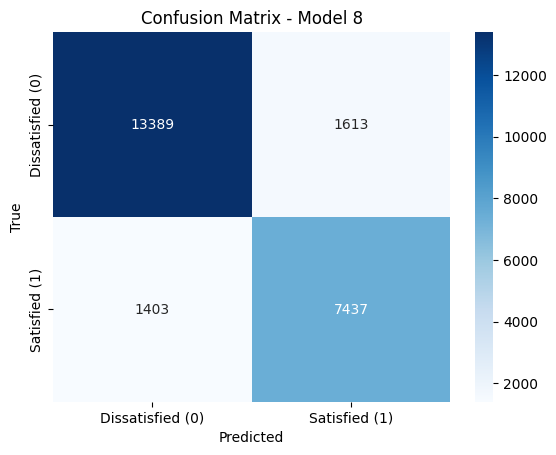

In [35]:
test_loss, test_acc = model8.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc}")
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model8.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Dissatisfied (0)", "Satisfied (1)"],
            yticklabels=["Dissatisfied (0)", "Satisfied (1)"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model 8')
plt.show()


##Conclusion and Discussion


I built a deep learning pipeline using Keras to predict hotel booking cancellations, working with a  Kaggle dataset (119,390 bookings, 30 features). I cleaned up the data by balanced it with SMOTE to handle imbalanced classes, and preprocessed everything (one-hot encoding and scaling).

 Then, I tried out ten different neural network models things like learning rates (0.0001 to 0.001), dropout (0.3 to 0.1), batch normalization, and the number of layers (1 to 4, with up to 512 neurons).

Model 8, with three layers (256, 128, 64 neurons), a touch of dropout (0.1), and batch normalization, came out on top with a solid 86.78% validation accuracy and 87.3% test accuracy, plus 82.1% precision, 84.1% recall, and 83.1% F1-score. Means,  hotels can plan better and save money by targeting cancellations with strategies like special offers.

This  shows how deep learning can help hotels understand customers to have a better decision making for managers and marketing to invest on and showing the effectiveness of machine learning for driving business decisions.

But is still gets ~12.7% of test cases wrong, maybe because of noisy features like adr or not enough feature tweaks. Although it can be a bit mysterious, making it is hard to explain what’s going on inside neural networks.